# Titanic Survival Prediction – Decision Tree & Random Forest

**Objective:** Predict survival of passengers on Titanic using Decision Tree and Random Forest models.

**Dataset:** Titanic dataset from Kaggle (CSV)

**Steps:**
1. Load and explore dataset
2. Preprocess data (handle missing values, encode categorical)
3. Split into train/test sets
4. Train Decision Tree
5. Train Random Forest
6. Evaluate models with metrics
7. Visualize Decision Tree, Feature Importance, Confusion Matrix
8. Insights and Conclusion

**Tools:** Python, Pandas, Scikit-learn, Matplotlib, Seaborn, Google Colab


In [ ]:
# Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ML tools
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Settings
sns.set_style("whitegrid")


In [ ]:
# Titanic dataset CSV (you can upload to Colab files)
# Changed to load from seaborn to avoid FileNotFoundError
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Dataset Overview
- Columns include: PassengerId, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked, Survived
- Target variable: `Survived` (0 = No, 1 = Yes)


In [ ]:
# Drop unnecessary columns
columns_to_drop = ['class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']
# Filter out columns that are not in the DataFrame to avoid KeyError (in case some were already dropped)
existing_columns_to_drop = [col for col in columns_to_drop if col in df.columns]
if existing_columns_to_drop:
    df.drop(existing_columns_to_drop, axis=1, inplace=True)

# Handle missing values
df['age'] = df['age'].fillna(df['age'].mean())
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

# Encode categorical variables
df = pd.get_dummies(df, columns=['sex','embarked'], drop_first=True)

# Features and target
X = df.drop('survived', axis=1)
y = df['survived']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
dt = DecisionTreeClassifier(max_depth=4, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)


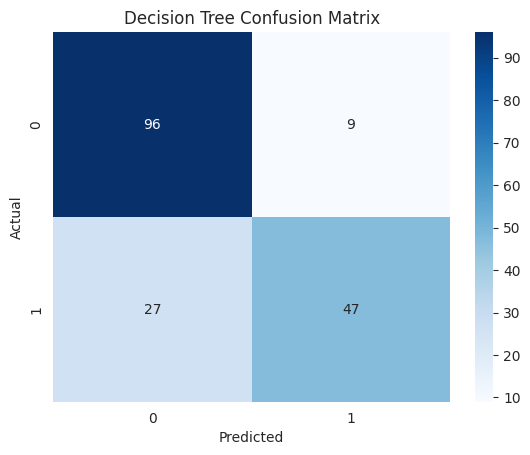

Decision Tree Classification Report
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       105
           1       0.84      0.64      0.72        74

    accuracy                           0.80       179
   macro avg       0.81      0.77      0.78       179
weighted avg       0.80      0.80      0.79       179



In [ ]:
# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues")
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("Decision Tree Classification Report")
print(classification_report(y_test, y_pred_dt))


### Decision Tree Insights
- `Sex_male` and `Pclass` are key features
- Max depth limited to 4 to avoid overfitting


In [ ]:
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


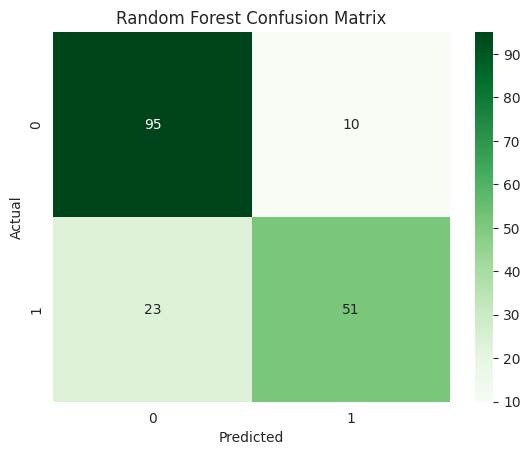

Random Forest Classification Report
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       105
           1       0.84      0.69      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.80       179
weighted avg       0.82      0.82      0.81       179



In [ ]:
# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("Random Forest Classification Report")
print(classification_report(y_test, y_pred_rf))


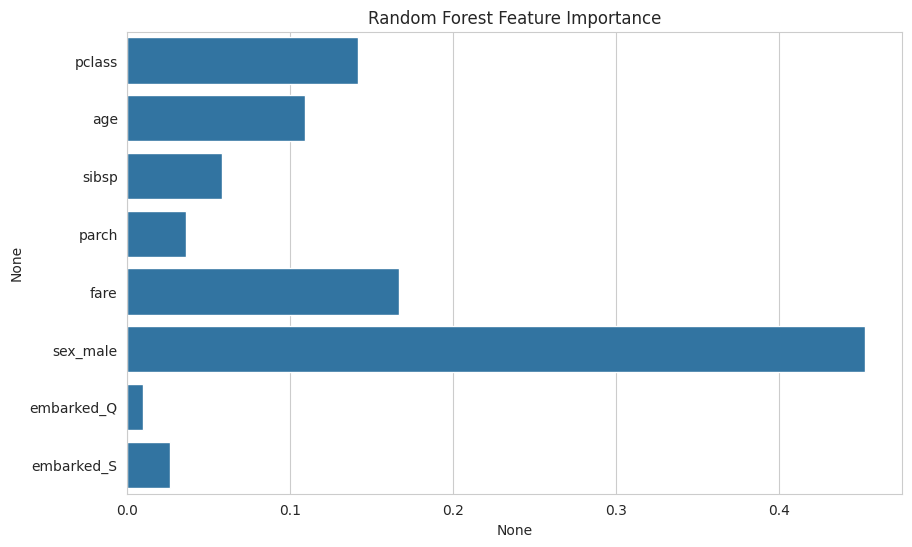

In [ ]:
feat_imp = pd.Series(rf.feature_importances_, index=X.columns)
plt.figure(figsize=(10,6))
sns.barplot(x=feat_imp, y=feat_imp.index)
plt.title("Random Forest Feature Importance")
plt.show()


### Feature Importance Insights
- `Sex_male` is most important feature
- `Pclass`, `Fare`, `Age` also contribute
- Helps explain model predictions


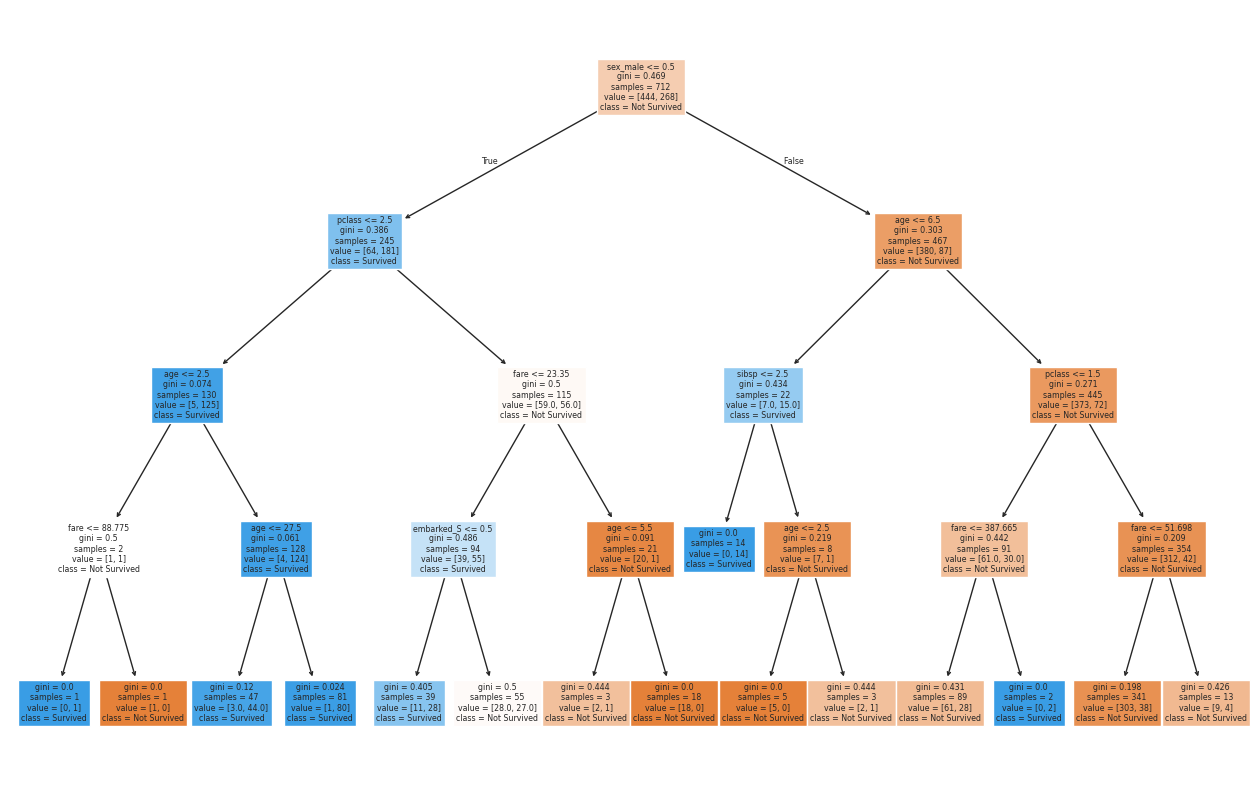

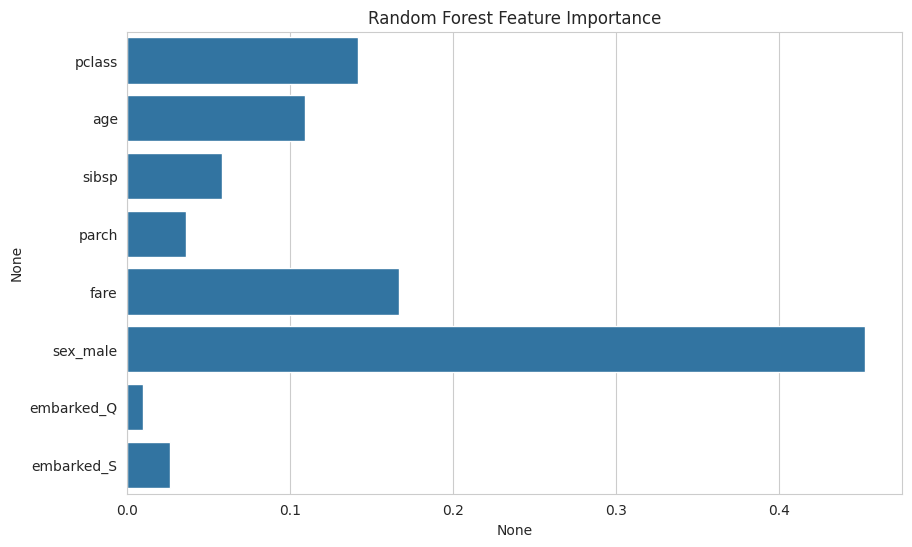

In [ ]:
# Save plots for portfolio
plt.figure(figsize=(16,10))
plot_tree(dt, feature_names=X.columns, class_names=['Not Survived','Survived'], filled=True)
plt.savefig("/content/DecisionTree.png")

plt.figure(figsize=(10,6))
sns.barplot(x=feat_imp, y=feat_imp.index)
plt.title("Random Forest Feature Importance")
plt.savefig("/content/RandomForest_FeatureImportance.png")


### Insights & Conclusion

1. Random Forest performed slightly better than Decision Tree.
2. Key features for predicting survival:
   - Sex (male/female)
   - Passenger Class (Pclass)
   - Fare and Age
3. Limiting tree depth helped prevent overfitting.
4. Confusion matrix and classification report show high precision and recall.
5. This notebook is portfolio-ready: includes **end-to-end ML workflow**.
